# Analise sobre o racismo ambiental na baixada fluminense

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from zipfile import ZipFile
import seaborn as sn

### Analise de dados sobre queimadas 

In [2]:
pasta = "C:\\Users\\wesle\\Downloads\\"
focos_abertos = os.path.join(pasta,'Focos_BDQueimadas.zip')

In [3]:
with ZipFile(focos_abertos) as z:
    with z.open(f'Focos_2022-01-01_2022-12-11.csv') as f:
        focos_queimadas = pd.read_csv(f,sep=',', encoding = 'utf-8')

In [4]:
focos_queimadas.head(1)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2022/04/13 15:44:00,NOAA-20,Brasil,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES,Mata Atlantica,2.0,2.6,0.3,-21.89052,-41.1526,2.8


In [5]:
focos_queimadas.dropna(subset = "riscofogo",inplace = True)
focos_queimadas.drop(["satelite"], axis = 1, inplace = True)

In [6]:
focos_queimadas['datahora'] = pd.to_datetime(focos_queimadas['datahora'], errors='coerce')

focos_queimadas['data'] = focos_queimadas['datahora'].dt.strftime('%d-%m-%Y')
focos_queimadas['hora'] = focos_queimadas['datahora'].dt.strftime('%H:%M:%S')

In [7]:
focos_queimadas['mês']= focos_queimadas['datahora'].dt.month

focos_queimadas['data'] = pd.to_datetime(focos_queimadas['data'], errors='coerce')

D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-04-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

In [8]:
focos_queimadas.drop(["datahora"], axis = 1, inplace = True)

In [9]:
focos_queimadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10496 entries, 0 to 10813
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pais          10496 non-null  object        
 1   estado        10496 non-null  object        
 2   municipio     10496 non-null  object        
 3   bioma         10496 non-null  object        
 4   diasemchuva   10496 non-null  float64       
 5   precipitacao  10496 non-null  float64       
 6   riscofogo     10496 non-null  float64       
 7   latitude      10496 non-null  float64       
 8   longitude     10496 non-null  float64       
 9   frp           9826 non-null   float64       
 10  data          10496 non-null  datetime64[ns]
 11  hora          10496 non-null  object        
 12  mês           10496 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [10]:
focos_queimadas.head(1)

,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora,mês
0,Brasil,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES,Mata Atlantica,2.0,2.6,0.3,-21.89052,-41.1526,2.8,2022-04-13,15:44:00,4


In [11]:
# Mínimo, abaixo de 0,15; 
# "Baixo", de 0,15 a 0,4; 
# Médio, de 0,4 a 0,7; 
# Alto, de 0,7 a 0,95 e; 
# Crítico, acima de 0.95

focos_queimadas['status'] = ""

for i,row in focos_queimadas.iterrows():
    
    if focos_queimadas["riscofogo"][i] < 0.1:
        focos_queimadas['status'][i] = "Mínimo"
        
    if focos_queimadas["riscofogo"][i] >= 0.9:
        focos_queimadas['status'][i] = "Crítico"
    
    elif focos_queimadas["riscofogo"][i] >= 0.1 and focos_queimadas["riscofogo"][i] < 0.4:
        focos_queimadas['status'][i] = "Baixo"
    
    elif focos_queimadas["riscofogo"][i] >= 0.4 and focos_queimadas["riscofogo"][i] < 0.7:
        focos_queimadas['status'][i] = "Médio"
    
    elif focos_queimadas["riscofogo"][i] >= 0.7 and focos_queimadas["riscofogo"][i] < 0.9:
        focos_queimadas['status'][i] = "Alto"
        

C:\Users\wesle\AppData\Local\Temp\ipykernel_7604\3694831648.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focos_queimadas['status'][i] = "Baixo"
C:\Users\wesle\AppData\Local\Temp\ipykernel_7604\3694831648.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focos_queimadas['status'][i] = "Crítico"
C:\Users\wesle\AppData\Local\Temp\ipykernel_7604\3694831648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focos_queimadas['sta

In [ ]:
# focos_queimadas['Status'] = ""

# focos_queimadas["Status"] = ["Minimo" if x < 0.1 else x for x in risco if x < 0.1 ]

# focos_queimadas["Status"] = ["Baixo" if x >= 0.1 else x , "Baixo" if x < 0.4 else x for x in risco]

# focos_queimadas["Status"] = ["Médio" for z in focos_queimadas["riscofogo"]  if z >= 0.4 if z < 0.7]

# focos_queimadas["Status"] = ["Alto" for l in focos_queimadas["riscofogo"] if l >= 0.7 if l < 0.9]

# focos_queimadas["Status"] = ["Crítico" for a in focos_queimadas["riscofogo"]  if a >= 0.9]

# focos_queimadas["Status"] = [ "Error" for b in focos_queimadas["riscofogo"] if b == -999.0]

In [12]:
df_condicao = focos_queimadas[focos_queimadas["riscofogo"] == -999.0]

focos_queimadas.drop(df_condicao.index, inplace = True)

In [13]:
dados_queimadas_bxd = focos_queimadas.loc[(focos_queimadas["municipio"] == "GUAPIMIRIM") | (focos_queimadas["municipio"] == "MAGE") | (focos_queimadas["municipio"] == "DUQUE DE CAXIAS") | (focos_queimadas["municipio"] == "NOVA IGUACU") | (focos_queimadas["municipio"] == "SAO JOAO DE MERITI") | (focos_queimadas["municipio"] == "MESQUITA") | (focos_queimadas["municipio"] == "NILOPOLIS") | (focos_queimadas["municipio"] == "BELFORD ROXO") | (focos_queimadas["municipio"] == "QUEIMADOS") | (focos_queimadas["municipio"] == "JAPERI") | (focos_queimadas["municipio"] == "PARACAMBI") | (focos_queimadas["municipio"] == "SEROPEDICA") | (focos_queimadas["municipio"] == "ITAGUAI")].sort_values('municipio')

dados_queimadas_RJ = focos_queimadas.loc[(focos_queimadas["municipio"] == "RIO DE JANEIRO")]

In [14]:
focos_queimadas

,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora,mês,status
0,Brasil,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES,Mata Atlantica,2.0,2.6,0.3,-21.89052,-41.15260,2.8,2022-04-13,15:44:00,4,Baixo
1,Brasil,RIO DE JANEIRO,CAMPOS DOS GOYTACAZES,Mata Atlantica,2.0,2.6,0.3,-21.89066,-41.15290,2.2,2022-04-13,15:44:00,4,Baixo
2,Brasil,RIO DE JANEIRO,SAO FIDELIS,Mata Atlantica,2.0,4.6,0.3,-21.65882,-41.73649,6.4,2022-04-13,16:35:00,4,Baixo
3,Brasil,RIO DE JANEIRO,SAO FIDELIS,Mata Atlantica,2.0,4.6,0.3,-21.65948,-41.74049,7.2,2022-04-13,16:35:00,4,Baixo
4,Brasil,RIO DE JANEIRO,ITABORAI,Mata Atlantica,2.0,0.1,0.9,-22.77275,-42.88610,1.4,2022-04-13,16:35:00,4,Crítico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,Brasil,RIO DE JANEIRO,SAO GONCALO,Mata Atlantica,-999.0,0.0,0.3,-22.85465,-42.97909,0.9,2022-11-04,03:51:00,4,Baixo
10806,Brasil,RIO DE JANEIRO,BOM JARDIM,Mata Atlantica,0.0,0.0,0.0,-22.14621,-42.39713,0.4,2022-11-04,03:51:00,4,Mínimo
10807,Brasil,RIO DE JANEIRO,RIO DE JANEIRO,Mata Atlantica,-999.0,0.3,0.1,-23.00871,-43.49652,14.0,2022-11-04,16:22:00,4,Baixo
10809,Brasil,RIO DE JANEIRO,ARARUAMA,Mata Atlantica,2.0,0.0,0.3,-22.79043,-42.37761,0.8,2022-12-04,03:34:00,4,Baixo


In [15]:
dados_queimadas_bxd.head(1)

,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,data,hora,mês,status
7181,Brasil,RIO DE JANEIRO,DUQUE DE CAXIAS,Mata Atlantica,-999.0,0.0,1.0,-22.66146,-43.3657,6.2,2022-08-09,16:07:00,9,Crítico


In [ ]:
# df_dados = dados_queimadas_bxd.groupby(['status', "municipio"]).count()

In [16]:
indices_municipios_bxd = dados_queimadas_bxd.groupby(["status", 'municipio']).agg({
    'status':'count', 
    'bioma':'first',
    'riscofogo':'first',
    'precipitacao':'first',
    'diasemchuva':'first',
    'data':'first',
    'mês': 'first' }).sort_values(by=['riscofogo'],ascending=False)

In [17]:
indices_municipios_bxd

status           bioma  riscofogo  precipitacao  \
status  municipio                                                          
Crítico ITAGUAI             110  Mata Atlantica       1.00          0.00   
        QUEIMADOS            36  Mata Atlantica       1.00          0.00   
        DUQUE DE CAXIAS      18  Mata Atlantica       1.00          0.00   
        NILOPOLIS            10  Mata Atlantica       1.00          0.00   
        NOVA IGUACU          87  Mata Atlantica       1.00          0.00   
        SEROPEDICA          368  Mata Atlantica       1.00          0.00   
        JAPERI               39  Mata Atlantica       0.99          0.00   
        PARACAMBI           104  Mata Atlantica       0.99          0.00   
        MESQUITA             10  Mata Atlantica       0.95          0.00   
        MAGE                  6  Mata Atlantica       0.94          0.00   
        GUAPIMIRIM           17  Mata Atlantica       0.93          0.00   
Alto    NOVA IGUACU          17  Mata Atlantica       0.87          0.00   
        MAGE                  3  Mata Atlantica       0.84          0.00   
        ITAGUAI              22  Mata Atlantica       0.84          0.00   
        PARACAMBI            18  Mata Atlantica       0.83          0.00   
        MESQUITA              4  Mata Atlantica       0.82          0.00   
        JAPERI                3  Mata Atlantica       0.82          0.00   
        SEROPEDICA           36  Mata Atlantica       0.80          0.70   
        GUAPIMIRIM            4  Mata Atlantica       0.78          3.60   
        DUQUE DE CAXIAS       3  Mata Atlantica       0.70          0.00   
        QUEIMADOS             1  Mata Atlantica       0.70          0.00   
Médio   NOVA IGUACU           4  Mata Atlantica       0.68          0.00   
        DUQUE DE CAXIAS       1  Mata Atlantica       0.61          0.00   
        PARACAMBI             7  Mata Atlantica       0.52          2.47   
        GUAPIMIRIM            6  Mata Atlantica       0.50          1.00   
        ITAGUAI              10  Mata Atlantica       0.50          0.00   
        MESQUITA              1  Mata Atlantica       0.50          0.00   
        SEROPEDICA           16  Mata Atlantica       0.40          0.00   
Baixo   DUQUE DE CAXIAS       8  Mata Atlantica       0.31          0.50   
        NOVA IGUACU           1  Mata Atlantica       0.31          5.32   
        SEROPEDICA            9  Mata Atlantica       0.30          0.00   
        GUAPIMIRIM            2  Mata Atlantica       0.20          0.00   
        ITAGUAI               5  Mata Atlantica       0.20          0.00   
        MAGE                  1  Mata Atlantica       0.20          0.00   
        JAPERI                3  Mata Atlantica       0.10          0.30   
Mínimo  DUQUE DE CAXIAS      16  Mata Atlantica       0.00         29.30   
        NOVA IGUACU           1  Mata Atlantica       0.00          0.00   
        PARACAMBI             1  Mata Atlantica       0.00          0.00   
        SEROPEDICA            1  Mata Atlantica       0.00         26.80   

                         diasemchuva       data  mês  
status  municipio                                     
Crítico ITAGUAI                  7.0 2022-08-25    8  
        QUEIMADOS                1.0 2022-03-13    3  
        DUQUE DE CAXIAS       -999.0 2022-08-09    9  
        NILOPOLIS             -999.0 2022-07-24    7  
        NOVA IGUACU           -999.0 2022-03-13    3  
        SEROPEDICA               7.0 2022-05-23    5  
        JAPERI                  26.0 2022-09-07    7  
        PARACAMBI                3.0 2022-10-09    9  
        MESQUITA              -999.0 2022-07-24    7  
        MAGE                  -999.0 2022-02-09    9  
        GUAPIMIRIM              25.0 2022-08-07    7  
Alto    NOVA IGUACU           -999.0 2022-12-07    7  
        MAGE                  -999.0 2022-07-07    7  
        ITAGUAI                 16.0 2022-02-09    9  
        PARACAMBI           

In [18]:
indices_RJ= dados_queimadas_RJ.groupby(["status", 'municipio']).agg({
    'status':'count',
    'bioma':'first',
    'riscofogo':'first',
    'precipitacao':'first',
    'diasemchuva':'first',
    'data':'first',
    'mês': 'first' }).sort_values(by=['riscofogo'],ascending=False)

In [19]:
indices_RJ

,,status,bioma,riscofogo,precipitacao,diasemchuva,data,mês
status,municipio,,,,,,,
Crítico,RIO DE JANEIRO,79,Mata Atlantica,1.0,0.0,-999.0,2022-04-21,4
Alto,RIO DE JANEIRO,33,Mata Atlantica,0.7,0.0,-999.0,2022-03-25,3
Médio,RIO DE JANEIRO,11,Mata Atlantica,0.4,0.0,4.0,2022-04-28,4
Baixo,RIO DE JANEIRO,16,Mata Atlantica,0.3,0.0,2.0,2022-06-05,5
Mínimo,RIO DE JANEIRO,2,Mata Atlantica,0.0,3.1,-999.0,2022-01-19,1


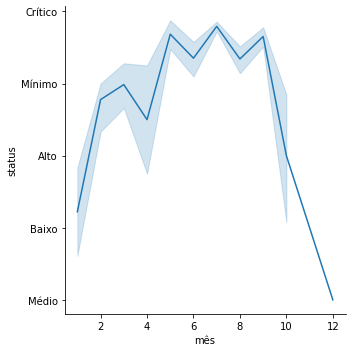

In [20]:
sn.relplot(data=dados_queimadas_bxd, x="mês", y="status", kind="line")

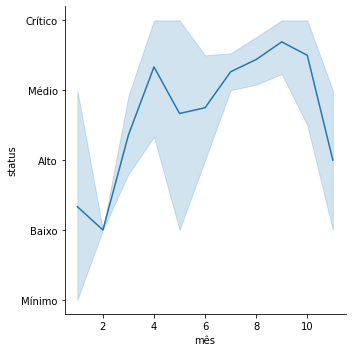

In [21]:
sn.relplot(data=dados_queimadas_RJ, x="mês", y="status", kind="line")

<AxesSubplot:xlabel='mês', ylabel='riscofogo'>

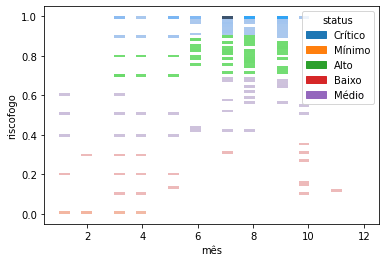

In [22]:
sn.histplot(dados_queimadas_bxd,x="mês", y ="riscofogo", hue = "status")

<AxesSubplot:xlabel='mês', ylabel='riscofogo'>

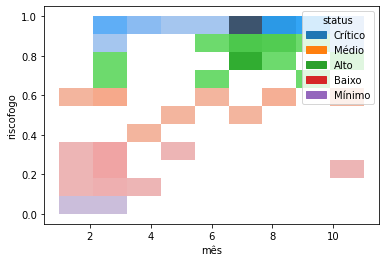

In [23]:
sn.histplot(dados_queimadas_RJ,x="mês", y ="riscofogo", hue = 'status')

In [24]:
dados_queimadas_bxd.to_excel("indices_BXD.xlsx", index = False)

dados_queimadas_RJ.to_excel("indices_RJ.xlsx", index = False)

In [ ]:
#SERIE TEMPORAL 

serie = pd.Series(df["Status"], index=pd.date_range('1/1/2020', periods = 500))
serie = serie.cumsum()
serie.plot()

### Analise sobre os incidentes de enchentes 

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
navegador_dados_abertos = webdriver.Chrome(chrome_options= chrome_options)

navegador_dados_abertos.get('https://dados.gov.br/dataset/anatel-utilidade-publica/resource/3e906fc3-a3cc-4f0a-998a-0af293f81aff')
WebDriverWait(navegador_dados_abertos, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div[3]/section/div[1]/div[1]/ul/li/a'))).click()
WebDriverWait(navegador_dados_abertos, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="content"]/div[3]/section/div[1]/p/a'))).click()
# navegador.find_element_by_xpath('').click()

In [ ]:
pasta = "C:\\Users\\wesle\\Documents\\dados"
dados = os.path.join(pasta, "notificacoes_alertas.zip")

with ZipFile(dados) as z:
    with z.open(f'notificacoes_alertas_tabela.csv') as f:
        dados_alerta = pd.read_csv(f, sep=';', error_bad_lines=False)

### Dados das precipitações do ano de 2022

In [ ]:
pasta_INMT = "C:\\Users\\wesle\\Documents\\"
dados_INMT = os.path.join(pasta_INMT, "dados_precipitacao_2022.zip")

with ZipFile(dados_INMT) as z:
    with z.open(f'dados_A603_D_2022-01-01_2022-07-31.csv') as f:
        dados_precipitacao = pd.read_csv(f, sep=';', error_bad_lines= False)

## Tratamento dos dados 

In [ ]:
dados_limpos['Data'] = pd.to_datetime(dados_limpos['Data'], errors='coerce')

dados_limpos['Data do alerta'] = dados_limpos['Data'].dt.strftime('%d-%m-%Y')
dados_limpos['Hora do alerta'] = dados_limpos['Data'].dt.strftime('%H:%M:%S')

In [ ]:
dados_limpos['Data'] = pd.to_datetime(dados_limpos['Data do alerta'], errors='coerce')

In [ ]:
dados_precipitacao['Data'] = pd.to_datetime(dados_precipitacao['Data Medicao'], errors='coerce')
del(dados_precipitacao['Data Medicao'])

In [ ]:
dados_precipitacao.head()
dados_precipitacao = dados_precipitacao.rename(columns={'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)': 'Precipitação Total diaria(mm)'})

In [ ]:
Dias_mais_chuvosos_NI_2022['mes']= Dias_mais_chuvosos_NI_2022['Data'].dt.month

In [ ]:
Dias_mais_chuvosos_NI_2022 = pd.merge(dados_NI_2022_chuva_intensa,dados_precipitacao ,how = 'inner', on = 'Data')

### Analise dos dados referente aos municipios 

In [ ]:
dados_NI_chuvasIntensas = dados_limpos.loc[(dados_limpos['UF'] == 'RJ') & (dados_limpos["Código IBGE"] == 3303500) & (dados_limpos["Tipo de Alerta"] == "CHUVAS INTENSAS")]

### Analise sobre a poluição do Ar 